In [4]:
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
import pandas as pd
import os

host = "rds-pg-jobs.chfavwsr5bmp.us-east-1.rds.amazonaws.com"
port = "5432"
dbname = "postgres"
user = "postgres"
password = os.environ.get('password')


engine = create_engine(
        f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{dbname}"
    )
Base = automap_base()
Base.prepare(engine, schema='market', reflect=True)

twitter = Base.classes.twitter

session = Session(engine)
engine.dispose()

twitter_result = session.query(twitter)

twitter_df = pd.read_sql(twitter_result.statement, con=engine.connect())

In [5]:
twitter_df

,id,twitter_date,tweet,likes,comments,retweets
0,0,2023-04-07,This is your chance to #TapIn to the #TechIndu...,1,0,0
1,1,2023-04-06,The Knowledge House is hiring #Career Coaches!...,0,0,0
2,2,2023-04-05,"Let's give it up to Kwame Bullen, our current ...",2,0,0
3,3,2023-04-04,ItÔÇÖs #TechTuesday!\nJoin us for a #DayintheL...,2,1,1
4,4,2023-04-03,TKH is having #OpenHouses at all of our expans...,3,0,0
...,...,...,...,...,...,...
468,468,2020-08-19,"This morning, TKH had the opportunity to ring ...",3,0,0
469,469,2020-07-08,Check out this awesome article by @bronxtimes ...,0,0,0
470,470,2020-06-23,Are you a high school student looking to make ...,2,0,2
471,471,2020-05-06,The 2020 Innovation Fellowship deadline has be...,0,0,0


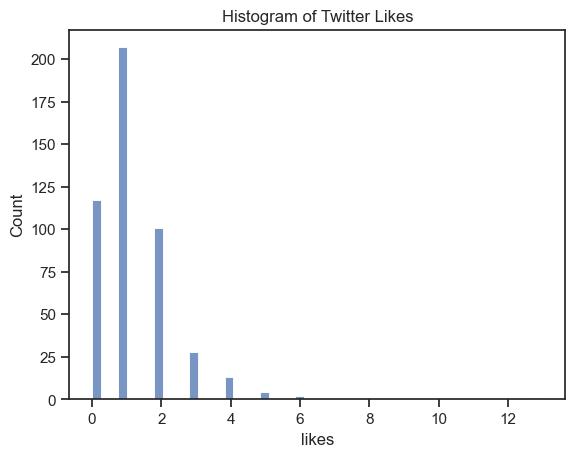

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# histogram of likes 
sns.histplot(data=twitter_df, x ='likes')
plt.title('Histogram of Twitter Likes')
plt.show()

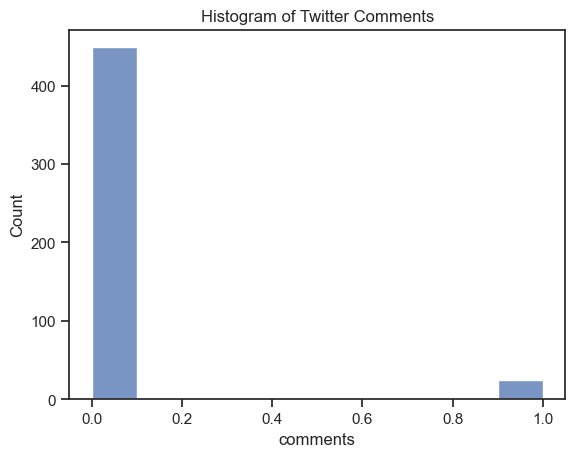

In [37]:
# histogram of comments 
sns.histplot(data=twitter_df, x ='comments')
plt.title('Histogram of Twitter Comments')
plt.show()

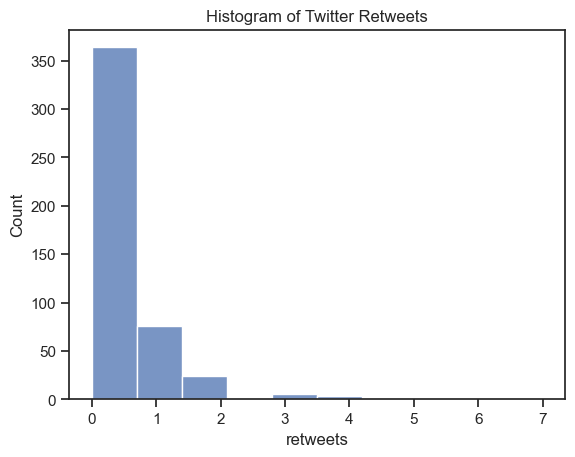

In [38]:
# histograms of retweets
sns.histplot(data=twitter_df, x ='retweets')
plt.title('Histogram of Twitter Retweets')
plt.show()

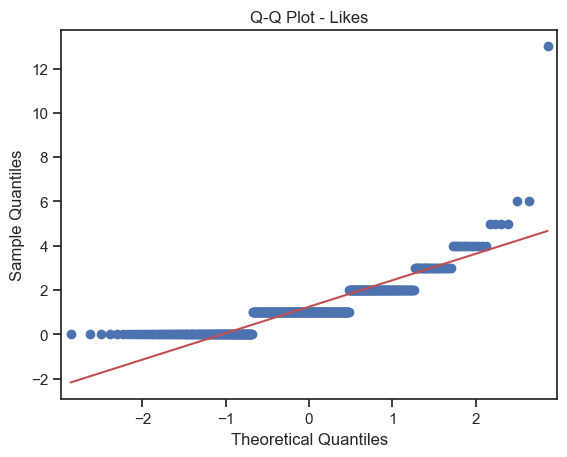

In [31]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

sorted_likes = twitter_df['likes'].sort_values()

sm.qqplot(sorted_likes, line='s')
plt.title('Q-Q Plot - Likes')
plt.show()

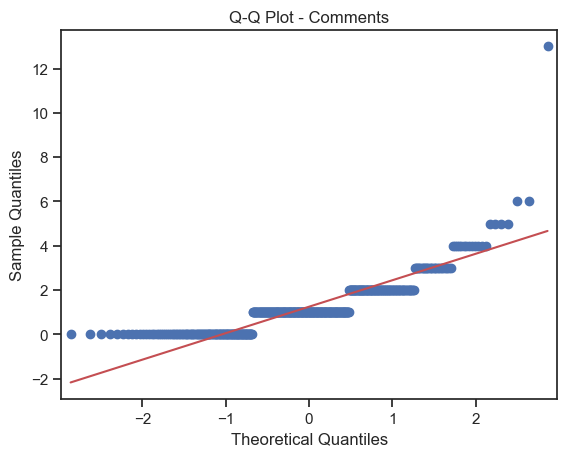

In [32]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

sorted_comments = twitter_df['comments'].sort_values()

sm.qqplot(sorted_likes, line='s')
plt.title('Q-Q Plot - Comments')
plt.show()

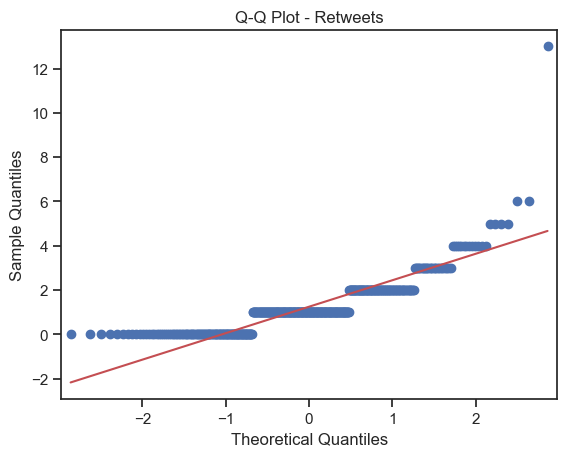

In [33]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

sorted_retweets = twitter_df['retweets'].sort_values()

sm.qqplot(sorted_likes, line='s')
plt.title('Q-Q Plot - Retweets')
plt.show()

In [45]:
# KS test - Likes
import scipy.stats as stats
import numpy as np 

stats.kstest(twitter_df["likes"], stats.norm.cdf, args=(twitter_df["likes"].mean(), twitter_df["likes"].std()))


KstestResult(statistic=0.26686045181469725, pvalue=3.1397740799925574e-30)

In [41]:
# KS test - Comments
stats.kstest(twitter_df["likes"], stats.norm.cdf, args=(twitter_df["comments"].mean(), twitter_df["comments"].std()))

KstestResult(statistic=0.7526349307358902, pvalue=3.5866013953591436e-278)

In [42]:
# # KS test - Retweets
stats.kstest(twitter_df["likes"], stats.norm.cdf, args=(twitter_df["retweets"].mean(), twitter_df["retweets"].std()))

KstestResult(statistic=0.5673001207974365, pvalue=2.4969598017171713e-144)

In [46]:
# Confidence Intervals - Likes

stats.t.interval(alpha=0.90, df=len(twitter_df["likes"])-1, loc=np.mean(twitter_df["likes"]), scale=stats.sem(twitter_df["likes"])) 


C:\Users\Tom\AppData\Local\Temp\ipykernel_26584\2305794825.py:3: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  stats.t.interval(alpha=0.90, df=len(twitter_df["likes"])-1, loc=np.mean(twitter_df["likes"]), scale=stats.sem(twitter_df["likes"]))


(1.1566648137536062, 1.3380497739842372)

In [47]:
# Confidence Intervals - Comments

stats.t.interval(alpha=0.90, df=len(twitter_df["likes"])-1, loc=np.mean(twitter_df["comments"]), scale=stats.sem(twitter_df["comments"])) 

C:\Users\Tom\AppData\Local\Temp\ipykernel_26584\2402722505.py:3: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  stats.t.interval(alpha=0.90, df=len(twitter_df["likes"])-1, loc=np.mean(twitter_df["comments"]), scale=stats.sem(twitter_df["comments"]))


(0.03409138003133913, 0.06738853540206467)

In [48]:
# Confidence Intervals - Retweets

stats.t.interval(alpha=0.90, df=len(twitter_df["likes"])-1, loc=np.mean(twitter_df["retweets"]), scale=stats.sem(twitter_df["retweets"])) 

C:\Users\Tom\AppData\Local\Temp\ipykernel_26584\1139451345.py:3: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  stats.t.interval(alpha=0.90, df=len(twitter_df["likes"])-1, loc=np.mean(twitter_df["retweets"]), scale=stats.sem(twitter_df["retweets"]))


(0.2776634151005698, 0.3904126948360052)

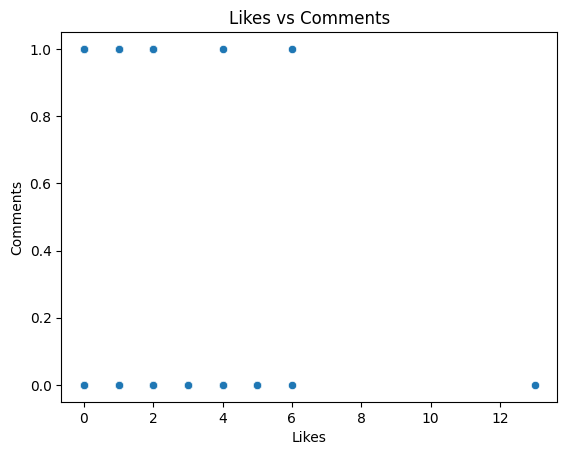

In [6]:
# Scatter plot - Likes vs Comments 
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=twitter_df, x='likes',y='comments')

plt.title('Likes vs Comments')
plt.xlabel('Likes')
plt.ylabel('Comments')

plt.show()

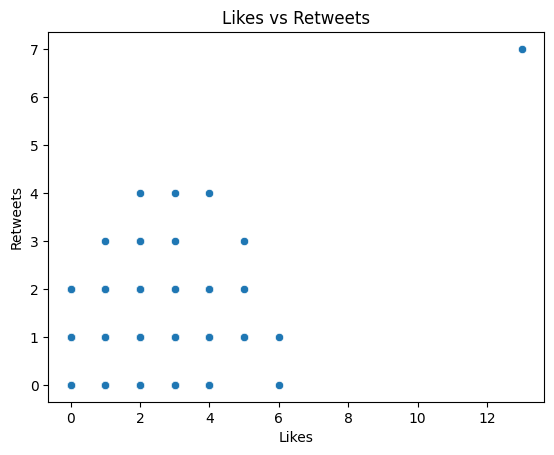

In [18]:
# Scatter plot - Likes vs Retweets
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=twitter_df, x='likes',y='retweets')

plt.title('Likes vs Retweets')
plt.xlabel('Likes')
plt.ylabel('Retweets')

plt.show()

C:\Users\Tom\AppData\Local\Temp\ipykernel_23628\2953926505.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = twitter_df.corr()


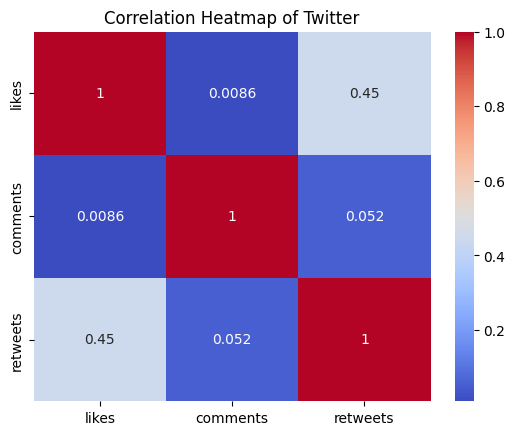

In [17]:
# Correlation heat-maps
correlation_matrix = twitter_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap of Twitter')
plt.show()

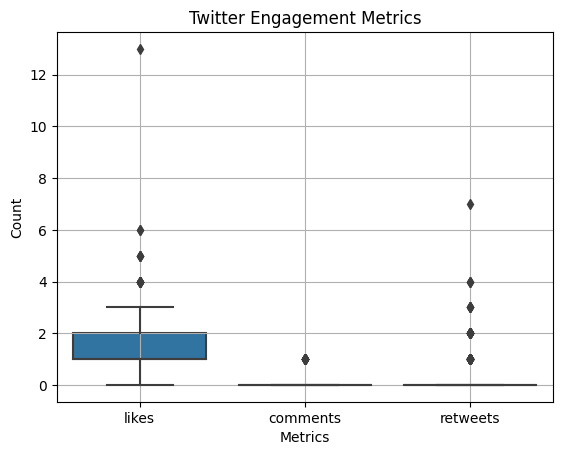

In [20]:
# Box-plots

sns.boxplot(data=twitter_df)

plt.xlabel('Metrics')
plt.ylabel('Count')
plt.title('Twitter Engagement Metrics')
plt.grid(True)

plt.show()


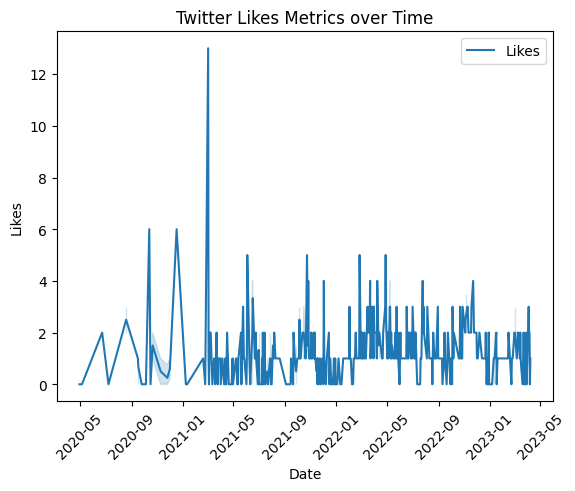

In [41]:
# Line-plots - Likes
sns.lineplot(data=twitter_df, x = twitter_df['twitter_date'], y='likes', label='Likes')

plt.xlabel('Date')
plt.ylabel('Likes')
plt.xticks(rotation=45)
plt.title('Twitter Likes Metrics over Time')
plt.show()

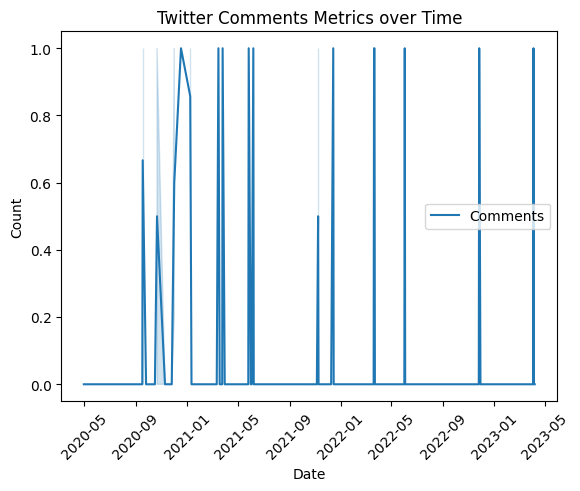

In [45]:
# Line-plots - Comments
sns.lineplot(data=twitter_df, x = twitter_df['twitter_date'], y='comments', label='Comments')

plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Twitter Comments Metrics over Time')
plt.show()

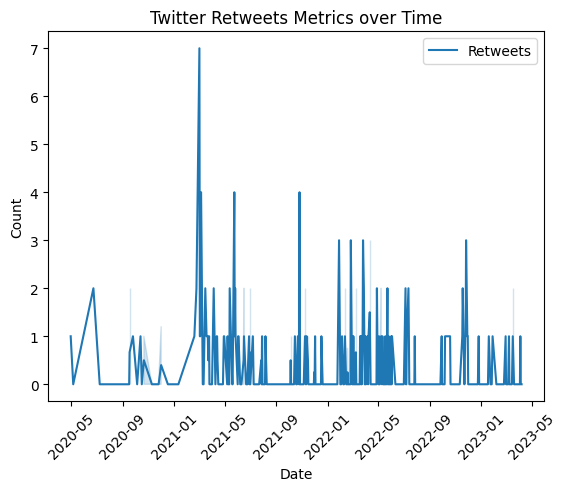

In [44]:
# Line-plots - Retweets 
sns.lineplot(data=twitter_df, x = twitter_df['twitter_date'], y='retweets', label='Retweets')

plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Twitter Retweets Metrics over Time')
plt.show()